<a href="https://colab.research.google.com/github/ShrutiUdagire/SupervisedLearning-Classification/blob/master/US_Heart_Patients_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(style='darkgrid')
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/My Drive/Categorical/Files/US_Heart_Patients.csv")

In [ ]:
df.shape

(4240, 16)

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

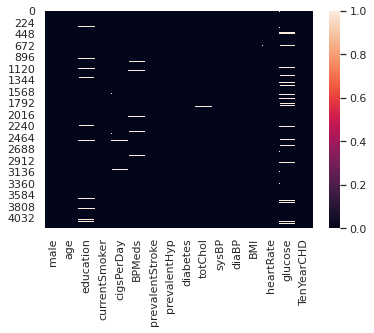

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df=df.dropna()
df.shape

(3658, 16)

In [ ]:
df.rename(columns={'male':'Gender'},inplace=True)
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df.corr()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Gender,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338


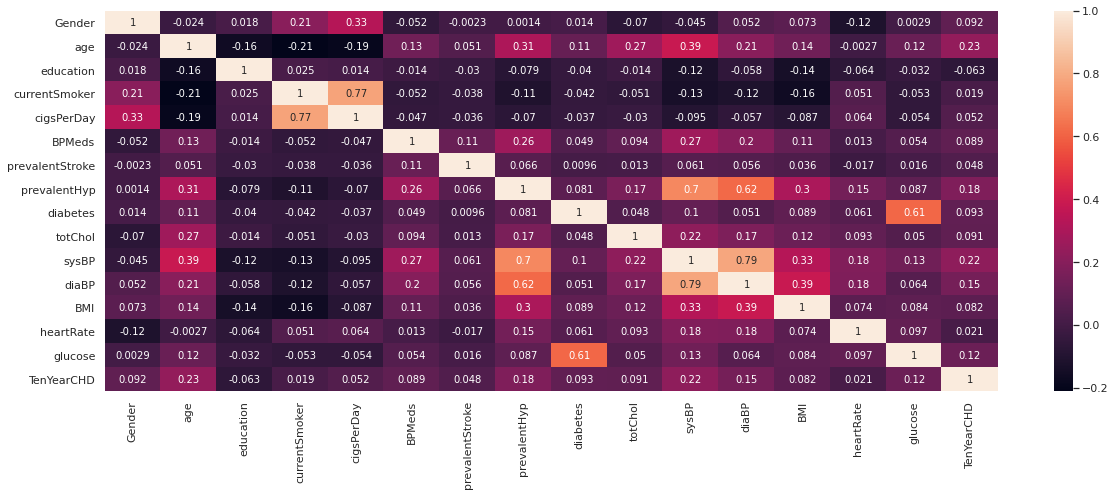

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)

Here highest correltion is 0.23.
Hence features with correlation 0.021 should be considered as important features
But if the highest correation scores are of 0.98,0.91 and the weakest correlation is 0.021 then in such scenario we can consider this as the weakest feature.
Hence its is difficult to make decision of significant features based on correlation matrix, statistical test pvlaue are considered


Splitting in train test in X and y

In [ ]:
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [ ]:
x_constant= sm.add_constant(x)
logit_model=sm.Logit(y,x_constant).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Sun, 21 Jun 2020   Pseudo R-squ.:                  0.1175
Time:                        10:20:28   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
Gender              0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

Pvalue<.05
We reject Null Hypothesis
That means,
ho:Feature is not significant
h1:Feature is significant

or (gender)

ho:Proportion of Male with TenYearCHD as 1= Proportion of Female with TenYearCHD as 1

h1:Proportion of Male with TenYearCHD as 1= Proportion of Female with TenYearCHD as 1


pvaluve< 0.05
we reject hull hypothesis

pvalue>0.05
We fail to reject Null Hypotheisis


# Backward Elimination Method(Pvalue approach)


In [ ]:
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.Logit(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376502
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376531
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376562
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376679
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376770
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376914
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377226
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377634
  

Manually written

In [ ]:
cols = x.columns
while (len(cols)>0):
    X_constant =sm.add_constant(x[cols])
    model = sm.Logit(y,X_constant).fit()
    highest_pvalue=round(model.pvalues,3).nlargest(1)    
    if(highest_pvalue[0] > 0.05):
        cols=cols.drop(highest_pvalue.index)
    else:
        break
print(cols)


Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376502
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376531
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376562
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376679
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376770
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376914
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377226
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377634
  

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3651
Method:                           MLE   Df Model:                            6
Date:                Sun, 21 Jun 2020   Pseudo R-squ.:                  0.1148
Time:                        10:20:28   Log-Likelihood:                -1381.4
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.408e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1353      0.475    -19.213      0.000     -10.067      -8.203
Gender         0.5617      0.107      5.258      0.000       0.352       0.771
age            0.0660      0.006     10.267      0.000       0.053       0.079
cigsPerDay     0.0192      0.004      4.606      0.000       0.011       0.027
totChol        0.0023      0.001      2.031      0.042    8.01e-05       0.004
sysBP          0.0175      0.002      8.155      0.000       0.013       0.022
glucose        0.0073      0.002      4.343      0.000       0.004       0.011
==============================================================================
"""

In Logistic regression(classification) the probablities are between 0-1.

taking log of that probabilities (0-1) will always give a negative value.

log(likelihood)=log(probablilty score)
hence lolog(likelihood) is negative

In [ ]:
xfinal=df[cols]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(xfinal,y,test_size=0.3,random_state=0)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_prediction=model.predict(X_test)
y_prediction 

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn import metrics
overall_accuracy_score=metrics.accuracy_score(y_test,y_prediction)
overall_accuracy_score*100

84.06193078324226

In [ ]:
model.score(X_test,y_test)

0.8406193078324226

In [ ]:
y_test.value_counts()

0    916
1    182
Name: TenYearCHD, dtype: int64

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_prediction)
confusion_matrix

array([[908,   8],
       [167,  15]])

# Sensitivity

In [ ]:
true_positive_rate=15/182
true_positive_rate

0.08241758241758242

# Specificity

In [ ]:
true_negative_rate=908/916
true_negative_rate

0.9912663755458515

# Alpha Error

In [ ]:
alpha=8/182
alpha

0.04395604395604396

# Beta Error

In [ ]:
beta=167/916
beta

0.18231441048034935

In [ ]:
df.shape

(3658, 16)

In [ ]:
np.round(model.coef_,4)

array([[0.5477, 0.0558, 0.0178, 0.0023, 0.0185, 0.0092]])

In [ ]:
xfinal.columns

Index(['Gender', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'], dtype='object')